In [82]:
import tabula  # Depenceny: Java
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [83]:
pdf = "https://d-sensors.shop/media/pdf/cf/44/bf/Kennlinie_NTC-10kOhm.pdf"
df_orig = tabula.read_pdf(pdf, pages='all',
                          pandas_options={'header': None, 'dtype':'string'},
                          encoding="utf-8")[0]

In [84]:
grad = pd.concat([df_orig[0], df_orig[2], df_orig[4]])
grad = grad.str.split(' ').str.get(0)
grad = grad.str.split('.').str.get(0)
grad = grad.to_list()
grad = [float(x) for x in grad]

ohm = pd.concat([df_orig[1], df_orig[3], df_orig[5]])
ohm = [float(x.replace(".","")) for x in ohm]

In [88]:
df = pd.DataFrame({'grad': grad, 'ohm': ohm})
df = df.loc[(0 <= df.grad) & (df.grad <= 100), :]
df.to_csv('ntc_10k.csv', index=False)  
df

,grad,ohm
40,0.0,32651.0
41,1.0,31031.0
42,2.0,29501.0
43,3.0,28054.0
44,4.0,26688.0
...,...,...
133,93.0,836.0
134,94.0,811.0
135,95.0,787.0
136,96.0,764.0


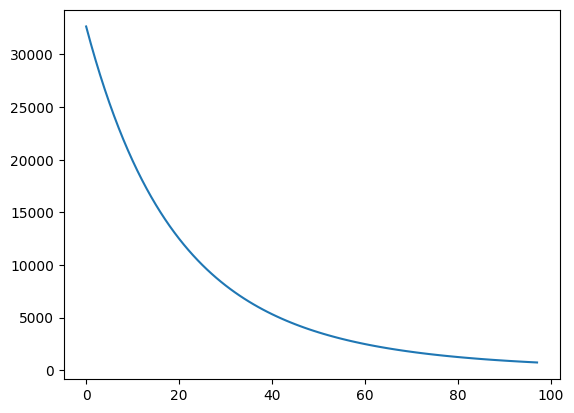

In [86]:
#plt.yscale('log')
plt.plot(df.grad, df.ohm)